## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [1]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns


Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

**Исследуем набор Xtrain**

In [3]:
Xtrain.head()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


In [4]:
Xtrain['target'].value_counts()

,count
target,
0,5708
1,1792


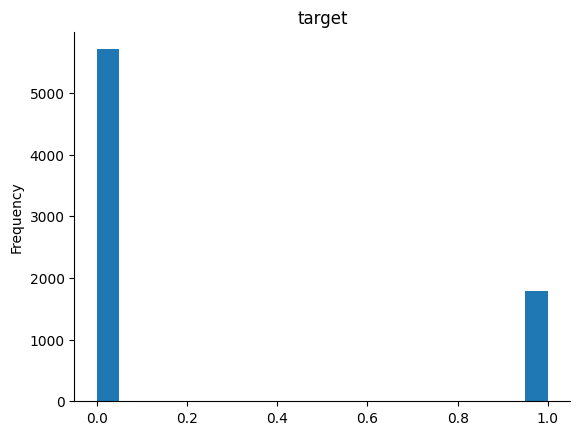

In [5]:
# @title target

from matplotlib import pyplot as plt
Xtrain['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

Видим дисбаланс в целевой переменной

In [6]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


Видим пропущенные значения по признаку f7, но обрезать выборку не будем. Заполним пропуски по методу интерполяции, f2, f11 - то же самое

In [7]:
Xtrain['f7'] =Xtrain['f7'].interpolate(method='linear', limit_direction='forward')
Xtrain['f2'] =Xtrain['f2'].interpolate(method='linear', limit_direction='forward')
Xtrain['f11'] =Xtrain['f11'].interpolate(method='linear', limit_direction='forward')

In [8]:
Xtrain.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
f1,7500.000000,38.579600,13.647719,17.000000,28.000000,37.000000,47.000000,90.000000
f2,7500.000000,238.869293,75.984770,64.259070,218.593930,218.593930,218.593930,575.396825
f3,7500.000000,190384.986800,105867.442524,19302.000000,118019.000000,179568.500000,239441.750000,1226583.000000
f4,7500.000000,0.238933,0.151738,0.000029,0.171817,0.179322,0.239316,0.729323
f5,7500.000000,10.083200,2.546071,1.000000,9.000000,10.000000,12.000000,16.000000
f6,7500.000000,0.238934,0.190283,0.049127,0.049127,0.098837,0.445026,0.445026
f7,7500.000000,0.241921,0.138375,0.000000,0.115721,0.241573,0.323043,0.482222
f8,7500.000000,0.238933,0.193365,0.009499,0.066581,0.103024,0.444334,0.484375
f9,7500.000000,23.893333,4.451530,5.970149,25.606721,25.606721,25.606721,25.606721
f10,7500.000000,0.238933,0.087708,0.113590,0.113590,0.300298,0.300298,0.300298


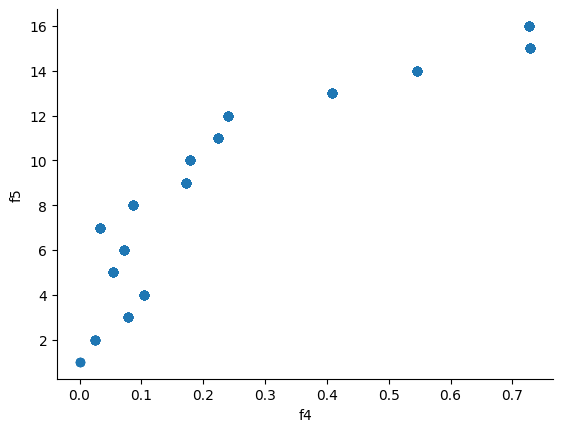

In [9]:
# @title f4 vs f5

from matplotlib import pyplot as plt
Xtrain.plot(kind='scatter', x='f4', y='f5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

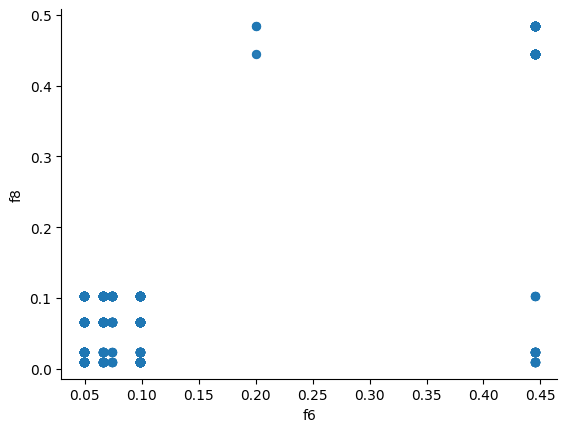

In [10]:
# @title f6 vs f8


Xtrain.plot(kind='scatter', x='f6', y='f8', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

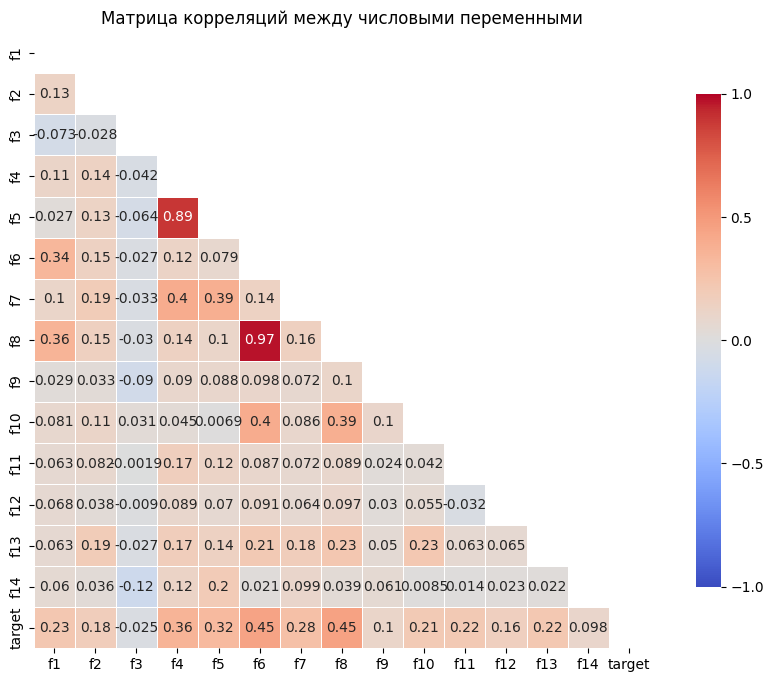

In [11]:
correlation_matrix = Xtrain.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()

Видим высокую корреляцию f6 и f8 а также f5 и f4

**Исследуем набор Xtest**

In [12]:
Xtest.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0


In [13]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


In [14]:
Xtest['target'].value_counts()

,count
target,
0,1913
1,587


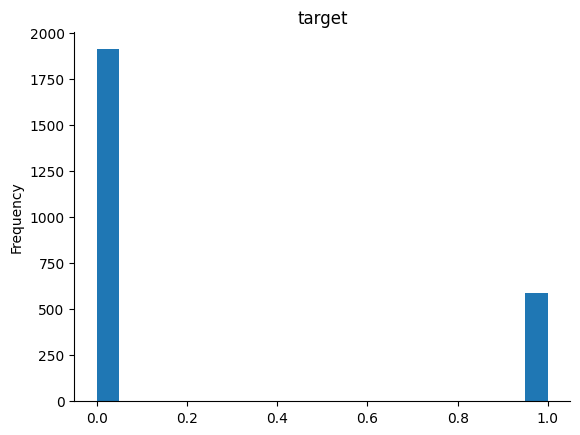

In [15]:
# @title target

from matplotlib import pyplot as plt
Xtest['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

Видим дисбаланс в целевой переменной также в набоер Xtest

In [16]:
Xtest.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
f1,2500.000000,38.069200,13.442168,17.000000,27.000000,37.000000,47.000000,90.000000
f2,2500.000000,238.933333,0.000000,238.933333,238.933333,238.933333,238.933333,238.933333
f3,2500.000000,191561.425200,107542.508483,19302.000000,119098.750000,177510.500000,238851.250000,910398.000000
f4,2500.000000,0.238933,0.000000,0.238933,0.238933,0.238933,0.238933,0.238933
f5,2500.000000,10.056800,2.554875,1.000000,9.000000,10.000000,12.000000,16.000000
f6,2500.000000,0.238933,0.000000,0.238933,0.238933,0.238933,0.238933,0.238933
f7,2500.000000,0.238933,0.000000,0.238933,0.238933,0.238933,0.238933,0.238933
f8,2500.000000,0.238933,0.000000,0.238933,0.238933,0.238933,0.238933,0.238933
f9,2500.000000,23.893333,0.000000,23.893333,23.893333,23.893333,23.893333,23.893333
f10,2500.000000,0.238933,0.000000,0.238933,0.238933,0.238933,0.238933,0.238933


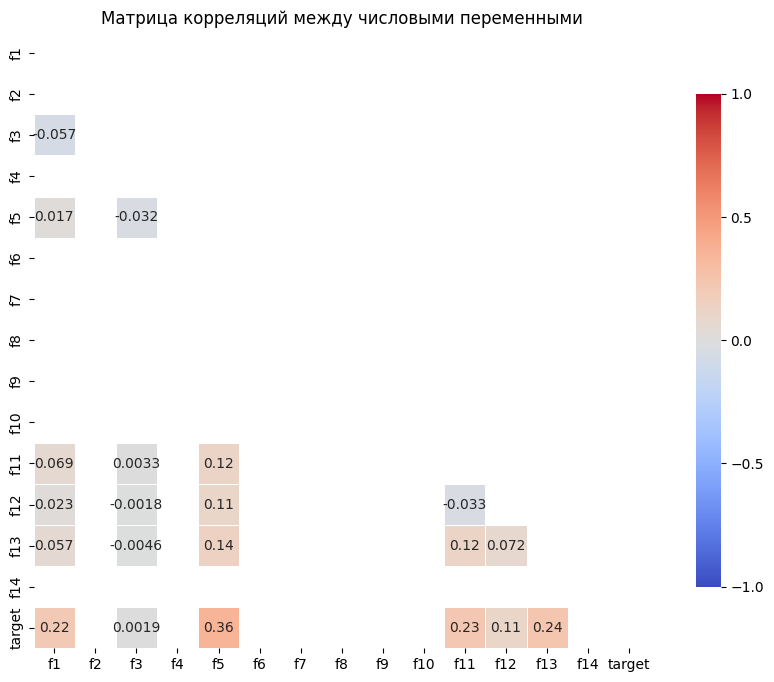

In [17]:
correlation_matrix = Xtest.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()

Замечаем, что признаки f2, f4, f6, f7, f8, f9, f10, f14 в наборе Xtest не имеют стандартного отклонения, все значения постоянны. Таким образом, они зашумляют модель, можно их вообще исключить из моделей (как обучающей, так и тестовой).

### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

При дисбалансе классов, как в нашем случае, не рекомендуется использовать метрику accuracy, т к она не учитывает это дисбаланс. Рекоментуются precision, recall, ROC AUC

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [36]:
X1 = Xtrain.drop('target', axis=1)
y1 = Xtrain['target']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

Строим модель логистической регрессии Base-Line, оцениваем ее точность

In [37]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.80      0.96      0.88      1704
           1       0.69      0.26      0.38       546

    accuracy                           0.79      2250
   macro avg       0.75      0.61      0.63      2250
weighted avg       0.78      0.79      0.76      2250



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print("Точность:", accuracy_score(y_test, y_pred1))
print("Точность:", precision_score(y_test, y_pred1, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred1, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred1, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred1))

Точность: 0.7928888888888889
Точность: 0.6923076923076923
Полнота: 0.26373626373626374
F1-мера: 0.3819628647214854
AUC: 0.6130887891451272


68,6% идентифицированных положительных случаев (target = 1) в действительности положительны, 28% всех положительных случаев правильно идентифицированы моделью

Строим модель опорных векторов Base-Line, оцениваем ее точность

In [39]:
model2 = SVC()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1704
           1       0.92      0.04      0.08       546

    accuracy                           0.77      2250
   macro avg       0.84      0.52      0.48      2250
weighted avg       0.80      0.77      0.68      2250



In [40]:
print("Точность:", accuracy_score(y_test, y_pred2))
print("Точность:", precision_score(y_test, y_pred2, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred2, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred2, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred2))

Точность: 0.7671111111111111
Точность: 0.9230769230769231
Полнота: 0.04395604395604396
F1-мера: 0.08391608391608392
AUC: 0.5213911675179281


показатель полноты близок к 0 , AUC около 0,5 - низкое предскаталеьное качество модели на минорном классе целевого признака

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

*1. Меняем параметр классификации тестового и обучающего набора на стратифицированную выборку *

In [43]:
X2 = Xtrain.drop('target', axis=1)
y2 = Xtrain['target']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=42)

Строим модель логистической регрессии и модель опорных векторов, оцениваем их качество

In [44]:
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1712
           1       0.69      0.28      0.40       538

    accuracy                           0.80      2250
   macro avg       0.75      0.62      0.64      2250
weighted avg       0.78      0.80      0.76      2250



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print("Точность:", accuracy_score(y_test, y_pred3))
print("Точность:", precision_score(y_test, y_pred3, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred3, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred3, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred3))

Точность: 0.7973333333333333
Точность: 0.6863636363636364
Полнота: 0.28066914498141265
F1-мера: 0.39841688654353563
AUC: 0.6201827033318278


In [27]:
model4 = SVC()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1712
           1       0.95      0.04      0.07       538

    accuracy                           0.77      2250
   macro avg       0.86      0.52      0.47      2250
weighted avg       0.81      0.77      0.68      2250



In [28]:
print("Точность:", accuracy_score(y_test, y_pred4))
print("Точность:", precision_score(y_test, y_pred4, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred4, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred4, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred4))

Точность: 0.7697777777777778
Точность: 0.9545454545454546
Полнота: 0.03903345724907063
F1-мера: 0.075
AUC: 0.519224672549769


2. Строим модели опорных векторов с разными параметрами

Сигмоидальное ядро

In [29]:
model5 = SVC(kernel='sigmoid')
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1712
           1       0.30      0.28      0.29       538

    accuracy                           0.67      2250
   macro avg       0.54      0.54      0.54      2250
weighted avg       0.66      0.67      0.67      2250



Радиальное ядро

In [30]:
model6 = SVC(kernel='rbf')
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1712
           1       0.95      0.04      0.07       538

    accuracy                           0.77      2250
   macro avg       0.86      0.52      0.47      2250
weighted avg       0.81      0.77      0.68      2250



Полиномиальное ядро

In [31]:
model7 = SVC(kernel='poly')
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1712
           1       0.94      0.05      0.10       538

    accuracy                           0.77      2250
   macro avg       0.85      0.53      0.49      2250
weighted avg       0.81      0.77      0.69      2250



Сигмоидальное ядро, сбалансированные классы

In [32]:
model8 = SVC(kernel='sigmoid', class_weight='balanced')
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.78      0.53      0.63      1712
           1       0.26      0.53      0.35       538

    accuracy                           0.53      2250
   macro avg       0.52      0.53      0.49      2250
weighted avg       0.66      0.53      0.56      2250



In [33]:
print("Точность:", accuracy_score(y_test, y_pred8))
print("Точность:", precision_score(y_test, y_pred8, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred8, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred8, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred8))

Точность: 0.5302222222222223
Точность: 0.26170798898071623
Полнота: 0.5297397769516728
F1-мера: 0.3503380454824831
AUC: 0.530056804363687


3. Применяем оверсамплинг SMOTE для минорного класса

In [45]:
X_0 = Xtrain.drop('target', axis=1)
y_0 = Xtrain['target']
smote = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=1)
X, y = smote.fit_resample(X_0, y_0)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Строим модель логистической регрессии и опорных векторов (наилучший вариант, полученный на предыдущем этапе)

In [46]:
model9 = LogisticRegression(max_iter=1000)
model9.fit(X_train, y_train)

y_pred9 = model9.predict(X_test)
print(classification_report(y_test, y_pred9))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      2284
           1       0.71      0.61      0.65      2283

    accuracy                           0.68      4567
   macro avg       0.68      0.68      0.68      4567
weighted avg       0.68      0.68      0.68      4567



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
model10 = SVC(kernel='sigmoid', class_weight='balanced')
model10.fit(X_train, y_train)
y_pred10 = model10.predict(X_test)
print(classification_report(y_test, y_pred10))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      2284
           1       0.53      0.53      0.53      2283

    accuracy                           0.53      4567
   macro avg       0.53      0.53      0.53      4567
weighted avg       0.53      0.53      0.53      4567



4. Проверяем лучшие модели на класса Xtest

In [49]:
X3 = Xtest.drop('target', axis=1)
y3 = Xtest['target']

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.9, stratify=y3, random_state=42)

Выбираем 3, 8, 9, 10 модели

In [50]:
y_pred3_t = model3.predict(X_test)
print("Точность:", accuracy_score(y_test, y_pred3_t))
print("Точность:", precision_score(y_test, y_pred3_t, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred3_t, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred3_t, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred3_t))

Точность: 0.8066666666666666
Точность: 0.729064039408867
Полнота: 0.2803030303030303
F1-мера: 0.4049247606019152
AUC: 0.6241817125963467


In [51]:
y_pred8_t = model8.predict(X_test)
print("Точность:", accuracy_score(y_test, y_pred8_t))
print("Точность:", precision_score(y_test, y_pred8_t, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred8_t, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred8_t, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred8_t))

Точность: 0.5431111111111111
Точность: 0.26591760299625467
Полнота: 0.5378787878787878
F1-мера: 0.3558897243107769
AUC: 0.5412971175166297


In [52]:
y_pred9_t = model9.predict(X_test)
print("Точность:", accuracy_score(y_test, y_pred9_t))
print("Точность:", precision_score(y_test, y_pred9_t, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred9_t, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred9_t, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred9_t))

Точность: 0.7195555555555555
Точность: 0.40337711069418386
Полнота: 0.4071969696969697
F1-мера: 0.4052780395852969
AUC: 0.6112639900749657


In [53]:
y_pred10_t = model10.predict(X_test)
print("Точность:", accuracy_score(y_test, y_pred10_t))
print("Точность:", precision_score(y_test, y_pred10_t, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred10_t, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred10_t, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred10_t))

Точность: 0.5413333333333333
Точность: 0.2644859813084112
Полнота: 0.5359848484848485
F1-мера: 0.3541927409261577
AUC: 0.5394790676802872


Удалось добиться показателей precision 0.4 и recall 0.4 у модели логистической регрессии и показателя precision 0.26 и recall 0.53 у модли опорных векторов.

5. Удалим зашумляющую модель признаки f2, f4. f6, f7, f8, f9, f10, f14. Переобучим модели

In [57]:
df1= Xtrain.drop(['f2', 'f4', 'f6', 'f7', 'f8', 'f9', 'f10', 'f14'], axis=1)

In [59]:
df2= Xtest.drop(['f2', 'f4', 'f6', 'f7', 'f8', 'f9', 'f10', 'f14'], axis=1)

In [58]:
X_0 = df1.drop('target', axis=1)
y_0 = df1['target']
smote = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=1)
X, y = smote.fit_resample(X_0, y_0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [60]:
model11 = LogisticRegression(max_iter=1000)
model11.fit(X_train, y_train)

y_pred11 = model11.predict(X_test)
print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      2284
           1       0.73      0.69      0.71      2283

    accuracy                           0.72      4567
   macro avg       0.72      0.72      0.72      4567
weighted avg       0.72      0.72      0.72      4567



In [61]:
model12 = SVC(kernel='sigmoid', class_weight='balanced')
model12.fit(X_train, y_train)
y_pred12 = model12.predict(X_test)
print(classification_report(y_test, y_pred12))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      2284
           1       0.54      0.54      0.54      2283

    accuracy                           0.54      4567
   macro avg       0.54      0.54      0.54      4567
weighted avg       0.54      0.54      0.54      4567



In [62]:
X4 = df2.drop('target', axis=1)
y4 = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.9, stratify=y4, random_state=42)

In [63]:
y_pred11_t = model11.predict(X_test)
print("Точность:", accuracy_score(y_test, y_pred11_t))
print("Точность:", precision_score(y_test, y_pred11_t, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred11_t, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred11_t, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred11_t))

Точность: 0.7608888888888888
Точность: 0.49362244897959184
Полнота: 0.7329545454545454
F1-мера: 0.5899390243902439
AUC: 0.7512043342836026


In [64]:
y_pred12_t = model12.predict(X_test)
print("Точность:", accuracy_score(y_test, y_pred12_t))
print("Точность:", precision_score(y_test, y_pred12_t, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred12_t, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred12_t, average = 'binary'))
print("AUC:", roc_auc_score(y_test, y_pred12_t))

Точность: 0.54
Точность: 0.2641860465116279
Полнота: 0.5378787878787878
F1-мера: 0.3543356207111666
AUC: 0.5392645971914264


Удалось добиться показателей precision 0.49 и recall 0.73 у модели логистической регрессии и показателя precision 0.26 и recall 0.54 у модели опорных векторов. Проверим, сможем ли добыиться аналогичных результатов, кобинируя две лучшие модели до удаления зашумляющих признаков (модели 9 и 10)

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [65]:
for i in range(0, 101):
    alpha = i / 100
    pred = (alpha * y_pred9_t + (1 - alpha) * y_pred10_t).astype(int)
    true_alpha = 0
    f1 = 0
    if f1_score(y_test, pred) > f1:
      true_alpha = alpha
      f1 = f1_score(y_test, pred)


print(f'{f1=}, {true_alpha=}')
pred_final = (true_alpha * y_pred9_t + (1 - true_alpha) * y_pred10_t).astype(int)
print("Точность:", precision_score(y_test, pred_final, average = 'binary'))
print("Полнота:", recall_score(y_test, pred_final, average = 'binary'))

f1=0.4052780395852969, true_alpha=1.0
Точность: 0.40337711069418386
Полнота: 0.4071969696969697


Комбинирование моделей 9 и 10 не дало такой же результат, как удаление зашумляющих признаков

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

При помощи удаления зашумляющих признаков, применение оверсемплинга и кластеризации для разделения обучающей и тестовой выборки удалось добиться максимальных показателей на тестовом наборе данных для модели логистической регрессии:
Точность (accuracy): 0.7608888888888888
Точность (precision): 0.49362244897959184
Полнота (recall): 0.7329545454545454
F1-мера: 0.5899390243902439
AUC: 0.7512043342836026

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.